# Exploration

In [2]:
import pandas as pd
from collections import Counter  #permet de compter les occurences des éléments dans une liste.

# Chargement des données
df = pd.read_csv('/home/mf/CoursOC/Projet5/mlflow/data/Prepared_Data_with_Embeddings.csv')
#conversion des titres en str et en liste pour les tags
df['Title'] = df['Title'].astype(str)
df['Tags'] = df['Tags'].apply(eval)

# Combinaison des tags (sous-liste) en une seule grande liste et compte des occurences de chaques Tags
tag_list = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = Counter(tag_list)

# Compte de la fréquence de chaque occurences
occurrence_counts = Counter(tag_counts.values())

# Nombre total de Tags
total_tags = len(tag_list)

# Stockage sous forme d'un dictionnaire pour associer chaque le nombre d'occurrences au 1er tags et au 1er titre associé à ce nombre d'occurence
example_tags = {}
example_titles = {}
example_indices = {}

for idx, row in df.iterrows():
    for tag in row['Tags']:
        if tag_counts[tag] not in example_tags:
            example_tags[tag_counts[tag]] = tag
            example_titles[tag_counts[tag]] = row['Title']
            example_indices[tag_counts[tag]] = idx


# Création d'un dataframe
occurrence_df = pd.DataFrame(occurrence_counts.items(), columns=['Nombre d\'Occurrences', 'Quantité de Tags ayant ce nombre d\'occurrences'])
occurrence_df.sort_values(by='Nombre d\'Occurrences', inplace=True)

# Calcul du pourcentage du du dataset représenté par un Tags avec ce nombre d'occurence
occurrence_df['Pourcentage (%)'] = (occurrence_df['Quantité de Tags ayant ce nombre d\'occurrences'] / total_tags) * 100
print(total_tags, "tags différents")

# Ajout de nouvelles colonnes pour afficher, pour l'exemple, le 1er Tags avec ce nombre d'occurence, le titres associé, et l'indice
occurrence_df['Exemple de Tags'] = occurrence_df['Nombre d\'Occurrences'].map(example_tags)
occurrence_df['1er Titre Associé'] = occurrence_df['Nombre d\'Occurrences'].map(lambda x: example_titles.get(x, 'N/A'))
occurrence_df['Index'] = occurrence_df['Nombre d\'Occurrences'].map(lambda x: example_indices.get(x, 'N/A'))
occurrence_df['1er Tags Associés'] = occurrence_df['Exemple de Tags'].map(lambda x: df.loc[df['Tags'].apply(lambda tags: x in tags), 'Tags'].values[0] if x in df['Tags'].explode().values else 'N/A')

# Réorganisation de l'ordre des colonnes
occurrence_df = occurrence_df[['Nombre d\'Occurrences', 'Quantité de Tags ayant ce nombre d\'occurrences', 'Pourcentage (%)', 'Exemple de Tags', '1er Titre Associé', '1er Tags Associés', 'Index']]

# Affichage des 20 premières lignes du DataFrame
print("Les 20 premières lignes du tableau classé par ordre croissant de nombre d'occurences de Tags dans la colonnes Tags ")
display(occurrence_df.head(20))

160861 tags différents
Les 20 premières lignes du tableau classé par ordre croissant de nombre d'occurences de Tags dans la colonnes Tags 


,Nombre d'Occurrences,Quantité de Tags ayant ce nombre d'occurrences,Pourcentage (%),Exemple de Tags,1er Titre Associé,1er Tags Associés,Index
21,1,4371,2.717253,mainframe,c socket api c++ z os,"[c++, c, sockets, mainframe, zos]",6
35,2,1607,0.998999,submit-button,multiple submit button html form,"[html, forms, form-submit, submit-button]",10
12,3,867,0.538975,data-storage,binary datum mysql,"[mysql, database, binary-data, data-storage]",3
11,4,565,0.351235,binary-data,binary datum mysql,"[mysql, database, binary-data, data-storage]",3
67,5,385,0.239337,combinatorics,generate list possible permutation string,"[string, language-agnostic, cross-platform, pe...",29
107,6,313,0.194578,bdd,primary difference tdd bdd,"[unit-testing, tdd, bdd]",66
41,7,250,0.155414,internet-explorer-7,width collapse percentage width child element ...,"[html, css, internet-explorer-7]",13
25,8,189,0.117493,rdbms,check change sql server table,"[sql, sql-server, datatable, rdbms]",7
31,9,156,0.096978,hook,good way allow plugin php application,"[php, plugins, architecture, hook]",9
117,10,129,0.080193,popup,detect browser block popup,"[javascript, html, popup]",78


Ce tableau montre que que 4371 tags n'apparaissent qu'une fois dans dans toutes la colonne Tags. Comme par exemple mainframe.
Voyons les premiers Tags ayant une seule occurence :

In [3]:
import pandas as pd

# Filtre des tags qui apparaissent une seule fois
tags_once = [tag for tag, count in tag_counts.items() if count == 1]

# DataFrame pour les 10 premiers tags
tags_once_df = pd.DataFrame({
    'Tag': tags_once[:10]})

# Affiche le DataFrame des 10 premiers tags représentés qu'une seule fois
display("Liste des 10 premiers Tags qui n'apparaissement qu'une fois dans le dataset", tags_once_df)


"Liste des 10 premiers Tags qui n'apparaissement qu'une fois dans le dataset"

,Tag
0,mainframe
1,zos
2,flat-file
3,email-spam
4,filelock
5,server-configuration
6,sealed-class
7,jbutton
8,long-long
9,xelement


Voyons les 10 dernières lignes de ce dataFrame pour voir les tags ayant le plus d'occurences :

In [4]:
dernières_lignes = occurrence_df.tail(10)
display(dernières_lignes)


,Nombre d'Occurrences,Quantité de Tags ayant ce nombre d'occurrences,Pourcentage (%),Exemple de Tags,1er Titre Associé,1er Tags Associés,Index
157,1576,1,0.000622,jquery,graph visualization library javascript,"[javascript, jquery, data-structures, graph-la...",138
40,1874,1,0.000622,css,width collapse percentage width child element ...,"[html, css, internet-explorer-7]",13
18,1898,1,0.000622,c++,c socket api c++ z os,"[c++, c, sockets, mainframe, zos]",6
80,1905,1,0.000622,git,git well subversion,"[svn, git]",38
32,2409,1,0.000622,html,multiple submit button html form,"[html, forms, form-submit, submit-button]",10
140,3105,1,0.000622,android,android simple alert dialog,"[android, dialog, android-alertdialog]",109
6,3822,1,0.000622,c#,fill dataset datatable linq query result set,"[c#, linq, web-services]",2
51,4551,1,0.000622,java,java lib app convert csv xml file,"[java, xml, csv, data-conversion]",21
78,5549,1,0.000622,javascript,detect define font web page,"[javascript, html, css, fonts]",37
3,6057,1,0.000622,python,asyncio event loop close get loop,"[python, python-asyncio, python-3.5]",1


Le mot le qui apparait le plus souvent dans les Tags est "python" suivi de javascript, java, c# et android

Affichons la distribution des Tags sur un histogramme

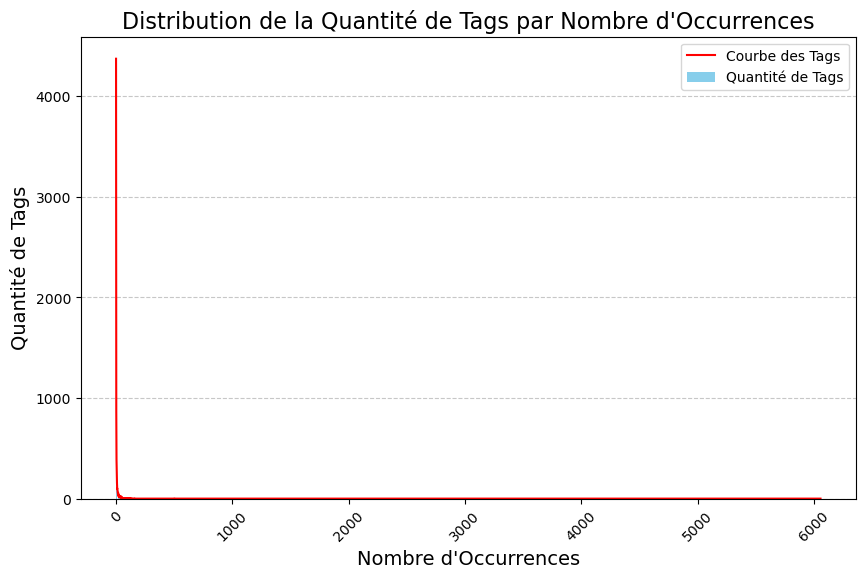

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogramme
plt.bar(occurrence_df['Nombre d\'Occurrences'], occurrence_df['Quantité de Tags ayant ce nombre d\'occurrences'], color='skyblue', label='Quantité de Tags')
# Courbe 
plt.plot(occurrence_df['Nombre d\'Occurrences'], occurrence_df['Quantité de Tags ayant ce nombre d\'occurrences'], color='red', linestyle='-', label='Courbe des Tags')

# Configuration du graphique
plt.title('Distribution de la Quantité de Tags par Nombre d\'Occurrences', fontsize=16)
plt.xlabel('Nombre d\'Occurrences', fontsize=14)
plt.ylabel('Quantité de Tags', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Affichage
plt.show()


**Conclusion :** La distribution des tags est très fortement asymétrique. Nous allons devoir en tenir compte lors de la modélisation.

# 1. Initialisation de l'Expérimentation MLFlow

In [ ]:
import mlflow

# Initialisation de l'expérimentation dans MLflow
mlflow.set_experiment("Classification de tags avec différents modèles")
print("Expérimentation 'Classification de tags avec différents modèles' initialisée dans MLflow.")


# 2. Entrainement des modèles

## 2.1 BOW

Avec le Bag of word, un texte est transformé en vecteur basé sur la fréquence d'apparition des mots dans ce texte. Countvectorizer permet de stocker ces vecteurs dans une matrice sparses.
Le pipeline de traitement : 
- Préparation des données
- Vectorisation des titres avec Bow et binarisation des tags
- Rééchantillonnage pour équilibrer le dataset en ajustant la distribution des Tags. L'objectif est le suivant :
  + Eliminer les tags extrêmement rares qui peuvent introduire du bruit sans apporter beaucoup d'information
  + Modérer la sur-représentation des Tags extrêmement fréquents ce qui pourrait biaiser le modèle. (overfitting)

Chargement et prétraitement des données...
Dimensions des tags d'entraînement : (39876, 1848)
Dimensions des tags de validation : (9969, 1848)
Nombre de tags dans y_train : 1848
Nombre de tags dans y_val : 1805
Vectorisation des titres d'entraînement...


Vectorisation des titres d'entraînement: 100%|████████████████████████████████████████████████████████████████| 39876/39876 [00:00<00:00, 103233.41it/s]


Vectorisation des titres de validation...


Vectorisation des titres de validation: 100%|███████████████████████████████████████████████████████████████████| 9969/9969 [00:00<00:00, 113631.90it/s]

Nombre de termes dans le vocabulaire : 3411
Quelques termes du vocabulaire : ['aar' 'able' 'abort' 'absolute' 'absolute path' 'absolute position'
 'abstract' 'abstract class' 'accept' 'access']
Entraînement du modèle BoW_Model...


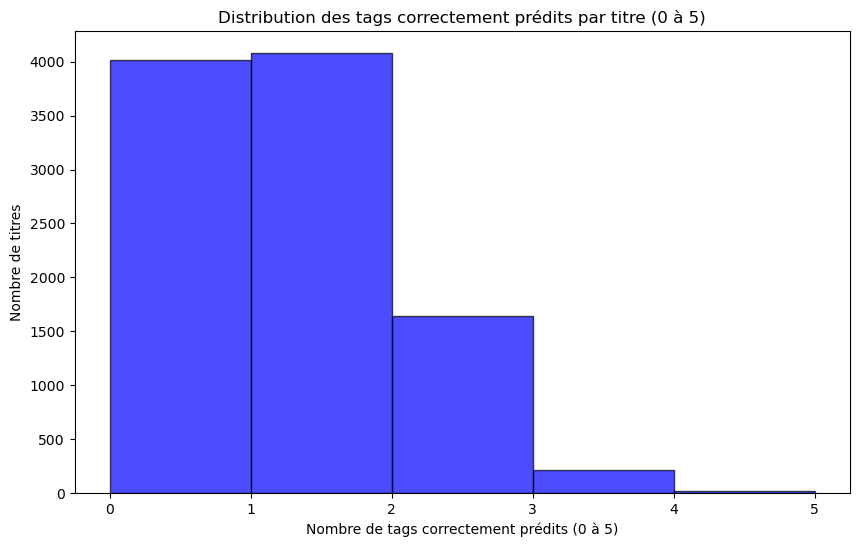

Nombre de titres où au moins un tag correct a été prédit : 5956 sur 9969
Proportion : 59.75%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 740 sur 9969
Nombre de faux positifs (tags prédits mais absents): 1570
Nombre de faux négatifs (tags manquants mais présents): 19910
Modèle: BoW_Model
Précision finale: 0.5879
Rappel final: 0.2889
F1 Score final: 0.3677


2024/08/23 01:12:59 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modèle enregistré


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
import mlflow
import mlflow.sklearn
from tqdm import tqdm
from collections import Counter
import re

# =============================== #
#         HYPERPARAMÈTRES         #
# =============================== #
echan = 1
# Hyperparamètres du Modèle (SGDClassifier)
model_params = {
    'loss': 'log_loss',  
    'alpha': 1e-4,       
    'penalty': 'l2',     
    'learning_rate': 'optimal',  
    'max_iter': 1000,    
    'tol': 1e-3,         
    'n_jobs': -1
}

# Fonction pour filtrer les nombres
def preprocess_text(text):
    # Supprime les nombres
    text = re.sub(r'\b\d+\b', '', text)
    # Supprime les espaces multiples
    text = ' '.join(text.split())
    return text

# Hyperparamètres de la Vectorisation (CountVectorizer)
vectorizer_params = {
    'max_features': 20000,       
    'ngram_range': (1, 3),      
    'stop_words': None,         
    'min_df': 10,  # Seuil de fréquence minimale pour inclure un terme dans le vocabulaire.           
    'max_df': 0.9, # Seuil de fréquence maximale pour inclure un terme dans le vocabulaire.          
    'token_pattern': r'\b[a-zA-Z]{2,}\b'  # Capturer les mots avec au moins deux lettres
}

# =============================== #
#       PRÉPARATION DES DONNÉES   #
# =============================== #

print("Chargement et prétraitement des données...")

# Chargement des données
df = pd.read_csv('/home/mf/CoursOC/Projet5/mlflow/data/Prepared_Data_with_Embeddings.csv')
df = df.sample(frac=echan, random_state=1)
df['Title'] = df['Title'].astype(str)
df['Tags'] = df['Tags'].apply(eval)
df.dropna(inplace=True)

# Filtre des tags les plus rares
tag_list = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = Counter(tag_list)
min_occurrences = 10
filtered_tags = {tag for tag, count in tag_counts.items() if count >= min_occurrences}

df['Filtered_Tags'] = df['Tags'].apply(lambda tags: [tag for tag in tags if tag in filtered_tags])
df = df[df['Filtered_Tags'].apply(len) > 0]

# Binarisation multi-label
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Filtered_Tags'])

# Appliquez la fonction de prétraitement
df['Title'] = df['Title'].apply(preprocess_text)

# Split des données
X_train, X_val, y_train, y_val = train_test_split(df['Title'], y, test_size=0.2, random_state=42)

# Vérifications
print("Dimensions des tags d'entraînement :", y_train.shape)
print("Dimensions des tags de validation :", y_val.shape)
print("Nombre de tags dans y_train :", np.sum(y_train.sum(axis=0) > 0))
print("Nombre de tags dans y_val :", np.sum(y_val.sum(axis=0) > 0))

print("Vectorisation des titres d'entraînement...")
vectorizer_bow = CountVectorizer(**vectorizer_params)
X_train_bow = vectorizer_bow.fit_transform(tqdm(X_train, desc="Vectorisation des titres d'entraînement"))

print("Vectorisation des titres de validation...")
X_val_bow = vectorizer_bow.transform(tqdm(X_val, desc="Vectorisation des titres de validation"))

# Vérifiez le vocabulaire généré
print("Nombre de termes dans le vocabulaire :", len(vectorizer_bow.get_feature_names_out()))
print("Quelques termes du vocabulaire :", vectorizer_bow.get_feature_names_out()[:10])

# =============================== #
#      CRÉATION DU PIPELINE      #
# =============================== #

# Le pipeline ne doit plus inclure CountVectorizer, car les données sont déjà vectorisées
pipeline = Pipeline([
    ('classifier', MultiOutputClassifier(SGDClassifier(**model_params)))  
])

# =============================== #
#      FONCTION D'ENTRAÎNEMENT ET D'ÉVALUATION   #
# =============================== #

def train_evaluate_model(X_train_bow, y_train, X_val_bow, y_val, model_name):
    print(f"Entraînement du modèle {model_name}...")
    
    # Démarrage d'une session MLFlow
    with mlflow.start_run(run_name=model_name):
        # Entraînement du modèle
        pipeline.fit(X_train_bow, y_train)

        # Évaluation du modèle
        y_pred = pipeline.predict(X_val_bow)
        
        # Appeler la fonction pour analyser les prédictions correctes
        analyze_correct_tag_predictions(y_val, y_pred, mlb)
        
        # Calcul du nombre de tags bien prédits
        correct_predictions = np.sum(np.all(y_pred == y_val, axis=1))
        print(f"Nombre de tags correctement prédits (pour tous les tags d'un échantillon): {correct_predictions} sur {y_val.shape[0]}")
        
        # Calcul des faux positifs et faux négatifs
        false_positives = np.sum((y_pred == 1) & (y_val == 0))
        false_negatives = np.sum((y_pred == 0) & (y_val == 1))
        print(f"Nombre de faux positifs (tags prédits mais absents): {false_positives}")
        print(f"Nombre de faux négatifs (tags manquants mais présents): {false_negatives}")
        
        # Calcul des métriques
        precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
        
        print(f"Modèle: {model_name}")
        print(f"Précision finale: {precision:.4f}")
        print(f"Rappel final: {recall:.4f}")
        print(f"F1 Score final: {f1:.4f}")

        # Enregistrement des métriques dans MLflow
        mlflow.log_metric("precision_final", precision)
        mlflow.log_metric("recall_final", recall)
        mlflow.log_metric("f1_score_final", f1)

        # Enregistrement du modèle final
        mlflow.sklearn.log_model(pipeline, model_name)
        print('Modèle enregistré')

# =============================== #
#        ENTRAÎNEMENT ET ÉVALUATION  #
# =============================== #

# Entraînement et évaluation du modèle
train_evaluate_model(X_train_bow, y_train, X_val_bow, y_val, "BoW_Model")


## 2.2 Bert 

Chargement et prétraitement des données...
Conversion des titres en embeddings BERT...


/home/mf/miniconda3/envs/AI/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Encodage BERT: 100%|████████████████████████████████████████████████████████████████████████████████████████████████| 1341/1341 [01:24<00:00, 15.78it/s]


Division des données en train et validation...
Dimensions des tags d'entraînement : (34308, 49)
Dimensions des tags de validation : (8578, 49)
Nombre de tags dans y_train : 49
Nombre de tags dans y_val : 49
Entraînement du modèle BERT_SGDClassifier_Model...
Entraînement sur les 4 CPU...


Entraînement des classificateurs:   2%|█▋                                                                                | 1/49 [00:26<21:17, 26.62s/it]


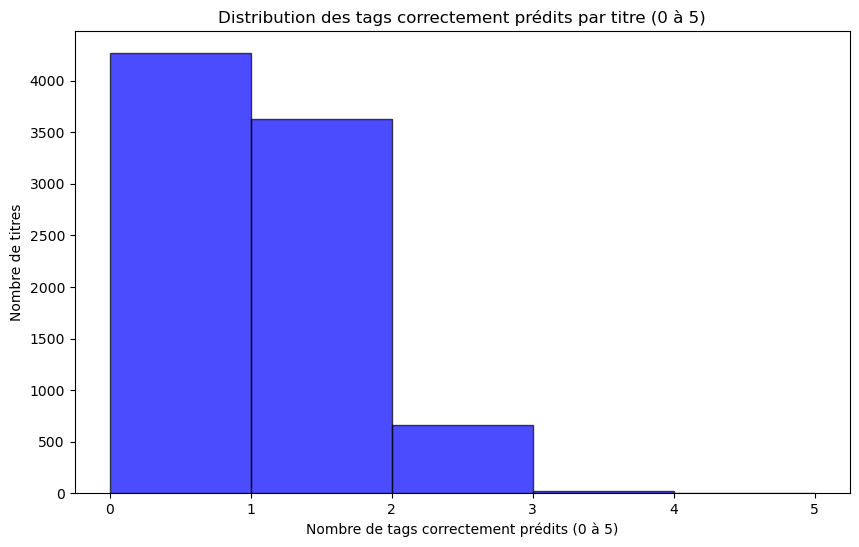

Nombre de titres où au moins un tag correct a été prédit : 4312 sur 8578
Proportion : 50.27%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2535 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1429
Nombre de faux négatifs (tags manquants mais présents): 7128
Modèle: BERT_SGDClassifier_Model
Précision finale: 0.7895
Rappel final: 0.4129
F1 Score final: 0.5185


2024/08/23 01:11:35 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modèle enregistré


In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import MultiLabelBinarizer
import mlflow
import mlflow.sklearn
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm
import gc
from collections import Counter
from joblib import Parallel, delayed

# =============================== #
#         HYPERPARAMÈTRES         #
# =============================== #
echan = 1
# Hyperparamètres du Modèle (SGDClassifier)
model_params = {
    'loss': 'log_loss',
    'alpha': 1e-4,
    'penalty': 'l2',
    'learning_rate': 'optimal',
    'max_iter': 1000,
    'tol': 1e-3,
    'n_jobs': 4  # Utilisation de 4 CPU
}

# Hyperparamètres du BERT
bert_params = {
    'max_length': 500
}

# Taille du batch pour l'encodage BERT
batch_size = 32

# =============================== #
#       PRÉPARATION DES DONNÉES   #
# =============================== #

print("Chargement et prétraitement des données...")

# Chargement des données
df = pd.read_csv('/home/mf/CoursOC/Projet5/mlflow/data/Prepared_Data_with_Embeddings.csv')
df = df.sample(frac=echan, random_state=1)  # Utiliser une fraction de l'ensemble pour le test

df['Title'] = df['Title'].astype(str)
df['Tags'] = df['Tags'].apply(eval)  # Conversion de la chaîne de caractères en liste
df.dropna(inplace=True)

# Filtrage des étiquettes rares
tag_list = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = Counter(tag_list)
min_occurrences = 400
filtered_tags = {tag for tag, count in tag_counts.items() if count >= min_occurrences}

df['Filtered_Tags'] = df['Tags'].apply(lambda tags: [tag for tag in tags if tag in filtered_tags])
df = df[df['Filtered_Tags'].apply(len) > 0]

# Binarisation des étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Filtered_Tags'])

# =============================== #
#   CONVERSION EN EMBEDDINGS BERT  #
# =============================== #

print("Conversion des titres en embeddings BERT...")

# Initialisation du tokenizer et du modèle BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def encode_texts_batch(texts, batch_size=32):
    embeddings = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Encodage BERT"):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', padding=True, truncation=True, **bert_params)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        with torch.no_grad():
            outputs = model(**inputs)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)

X_dense = encode_texts_batch(df['Title'].tolist(), batch_size=batch_size)

# =============================== #
#     DIVISION DES DONNÉES        #
# =============================== #

print("Division des données en train et validation...")

X_train, X_val, y_train, y_val = train_test_split(X_dense, y, test_size=0.2, random_state=42)

print("Dimensions des tags d'entraînement :", y_train.shape)
print("Dimensions des tags de validation :", y_val.shape)
print("Nombre de tags dans y_train :", np.sum(y_train.sum(axis=0) > 0))
print("Nombre de tags dans y_val :", np.sum(y_val.sum(axis=0) > 0))

# =============================== #
#    ENTRAÎNEMENT DU MODÈLE      #
# =============================== #

def train_classifier(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    return clf

def train_evaluate_model(X_train, y_train, X_val, y_val, model_name):
    print(f"Entraînement du modèle {model_name}...")

    # Démarrage d'une session MLFlow
    with mlflow.start_run(run_name=model_name):
        classifiers = [SGDClassifier(**model_params) for _ in range(y_train.shape[1])]

        print("Entraînement sur les 4 CPU...")

        # Utilisation de tqdm pour la progression
        with tqdm(total=y_train.shape[1], desc="Entraînement des classificateurs") as pbar:
            classifiers = Parallel(n_jobs=4)(
                delayed(train_classifier)(classifiers[i], X_train, y_train[:, i])
                for i in range(y_train.shape[1])
            )
            pbar.update()

        # Évaluation du modèle après l'entraînement
        y_pred = np.array([clf.predict(X_val) for clf in classifiers]).T
        
        # Appeler la fonction pour analyser les prédictions correctes
        analyze_correct_tag_predictions(y_val, y_pred, mlb)
        
        correct_predictions = np.sum(np.all(y_pred == y_val, axis=1))
        print(f"Nombre de tags correctement prédits (pour tous les tags d'un échantillon): {correct_predictions} sur {y_val.shape[0]}")

        false_positives = np.sum((y_pred == 1) & (y_val == 0))
        false_negatives = np.sum((y_pred == 0) & (y_val == 1))
        print(f"Nombre de faux positifs (tags prédits mais absents): {false_positives}")
        print(f"Nombre de faux négatifs (tags manquants mais présents): {false_negatives}")

        precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)
        
        print(f"Modèle: {model_name}")
        print(f"Précision finale: {precision:.4f}")
        print(f"Rappel final: {recall:.4f}")
        print(f"F1 Score final: {f1:.4f}")

        mlflow.log_metric("precision_final", precision)
        mlflow.log_metric("recall_final", recall)
        mlflow.log_metric("f1_score_final", f1)

        mlflow.sklearn.log_model(classifiers[0], model_name)
        print('Modèle enregistré')

# =============================== #
#        ENTRAÎNEMENT ET ÉVALUATION #
# =============================== #

train_evaluate_model(X_train, y_train, X_val, y_val, "BERT_SGDClassifier_Model")


## 2.3 Doc2vec + MLP

/home/mf/miniconda3/envs/AI/lib/python3.10/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Chargement et prétraitement des données...
Préparation des données pour Doc2Vec...


Creating Doc2Vec embeddings: 100%|██████████████████████████████████████████████████████████████████████████████| 42886/42886 [00:25<00:00, 1710.04it/s]


Division des données en train et validation...
Dimensions des tags d'entraînement : (34308, 49)
Dimensions des tags de validation : (8578, 49)
Nombre de tags dans y_train : 49
Nombre de tags dans y_val : 49
Le GPU est utilisé pour l'entraînement du modèle.
Entraînement du modèle Doc2Vec_MLP_Model...


Entraînement Epoch 1/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 729.03it/s]


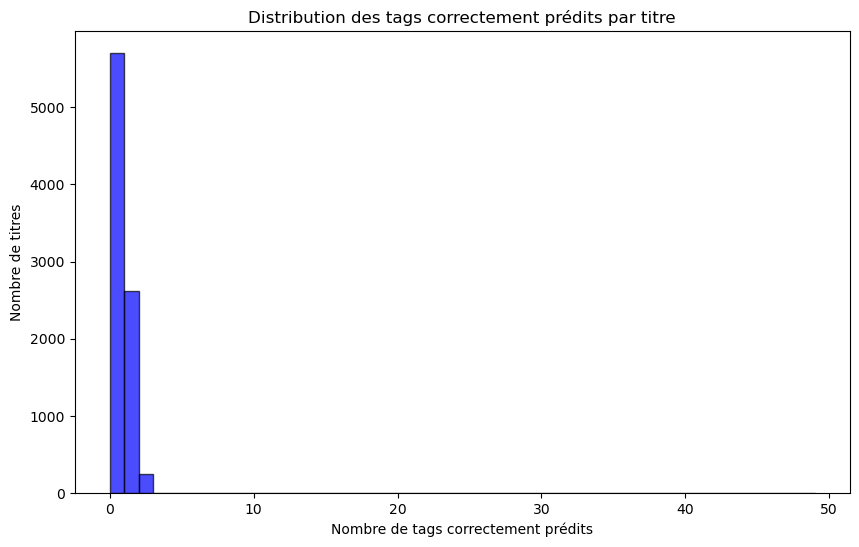

Nombre de titres où au moins un tag correct a été prédit : 2878 sur 8578
Proportion : 33.55%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 1714 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1015
Nombre de faux négatifs (tags manquants mais présents): 9004
Epoch 1/10 - Précision: 0.6709, Rappel: 0.2584, F1 Score: 0.3558


Entraînement Epoch 2/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 662.52it/s]


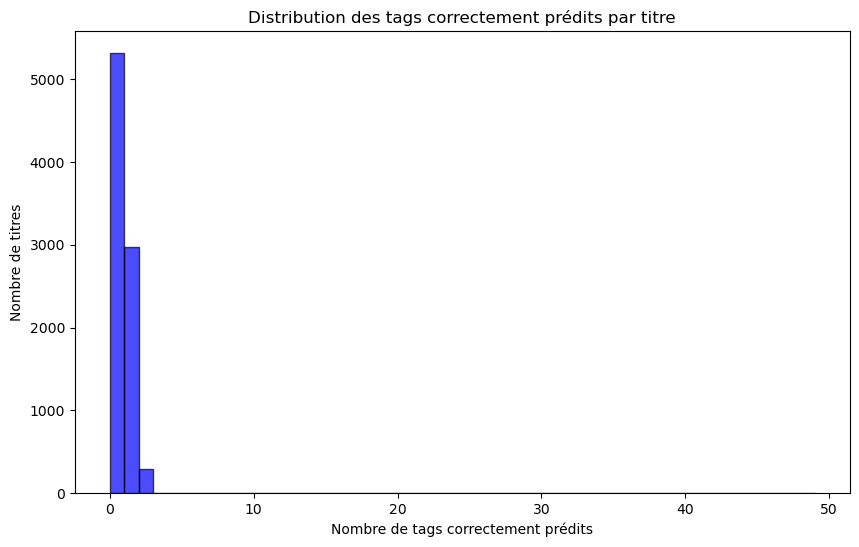

Nombre de titres où au moins un tag correct a été prédit : 3266 sur 8578
Proportion : 38.07%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 1943 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1017
Nombre de faux négatifs (tags manquants mais présents): 8576
Epoch 2/10 - Précision: 0.7113, Rappel: 0.2936, F1 Score: 0.4039


Entraînement Epoch 3/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 714.79it/s]


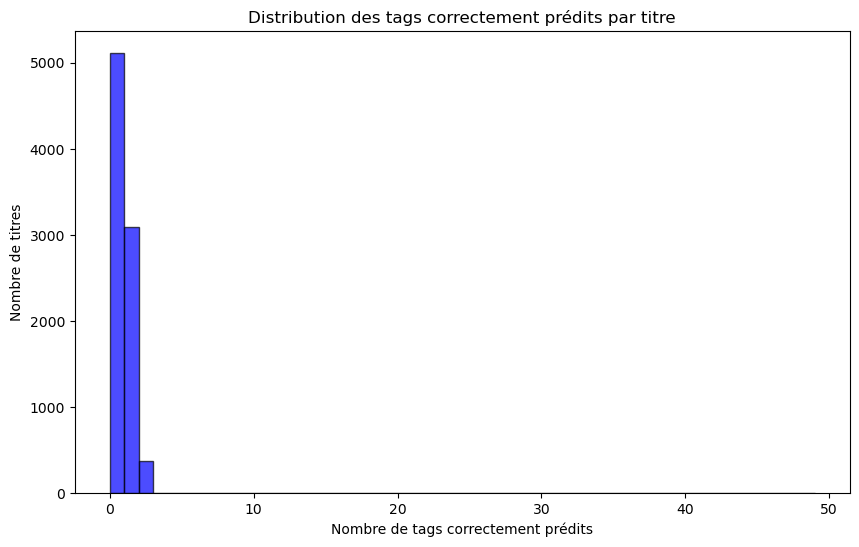

Nombre de titres où au moins un tag correct a été prédit : 3466 sur 8578
Proportion : 40.41%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2045 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1131
Nombre de faux négatifs (tags manquants mais présents): 8295
Epoch 3/10 - Précision: 0.7367, Rappel: 0.3168, F1 Score: 0.4323


Entraînement Epoch 4/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 717.70it/s]


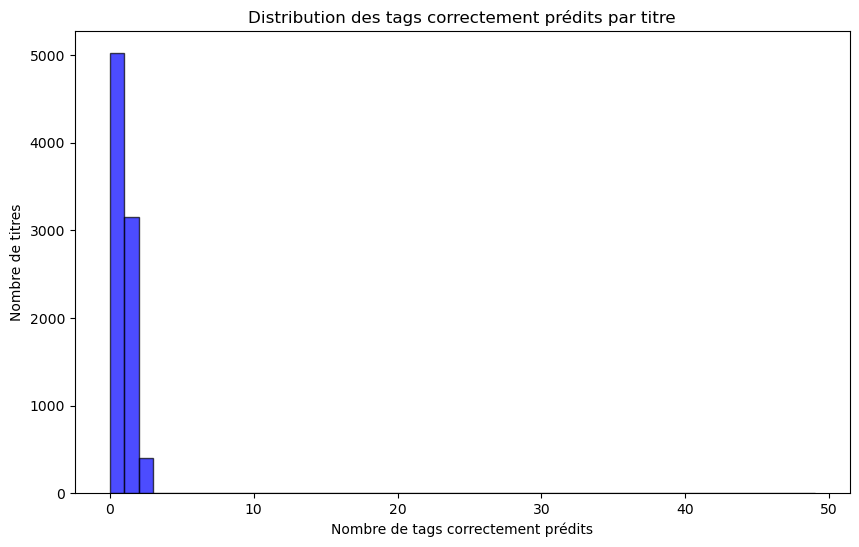

Nombre de titres où au moins un tag correct a été prédit : 3558 sur 8578
Proportion : 41.48%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2118 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1146
Nombre de faux négatifs (tags manquants mais présents): 8176
Epoch 4/10 - Précision: 0.7566, Rappel: 0.3266, F1 Score: 0.4389


Entraînement Epoch 5/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 728.48it/s]


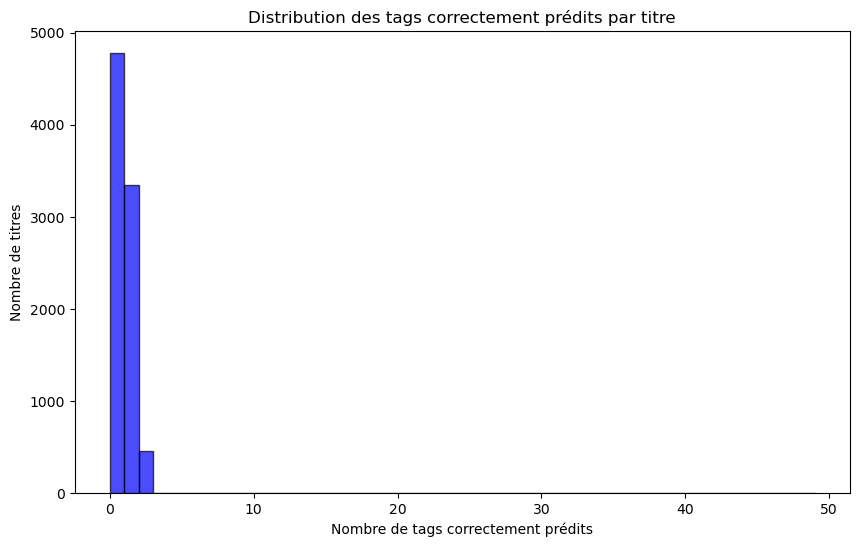

Nombre de titres où au moins un tag correct a été prédit : 3801 sur 8578
Proportion : 44.31%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2285 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1326
Nombre de faux négatifs (tags manquants mais présents): 7876
Epoch 5/10 - Précision: 0.7398, Rappel: 0.3513, F1 Score: 0.4615


Entraînement Epoch 6/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 753.03it/s]


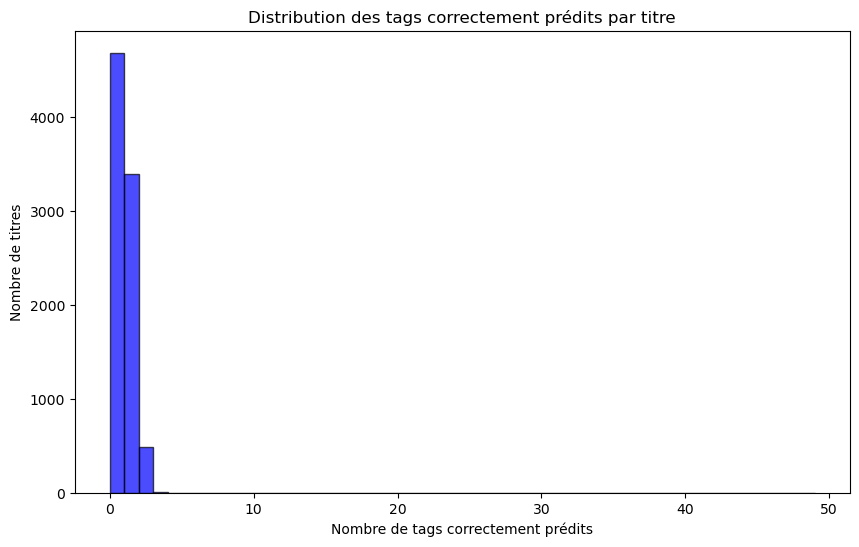

Nombre de titres où au moins un tag correct a été prédit : 3895 sur 8578
Proportion : 45.41%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2345 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1485
Nombre de faux négatifs (tags manquants mais présents): 7732
Epoch 6/10 - Précision: 0.7309, Rappel: 0.3631, F1 Score: 0.4700


Entraînement Epoch 7/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 732.32it/s]


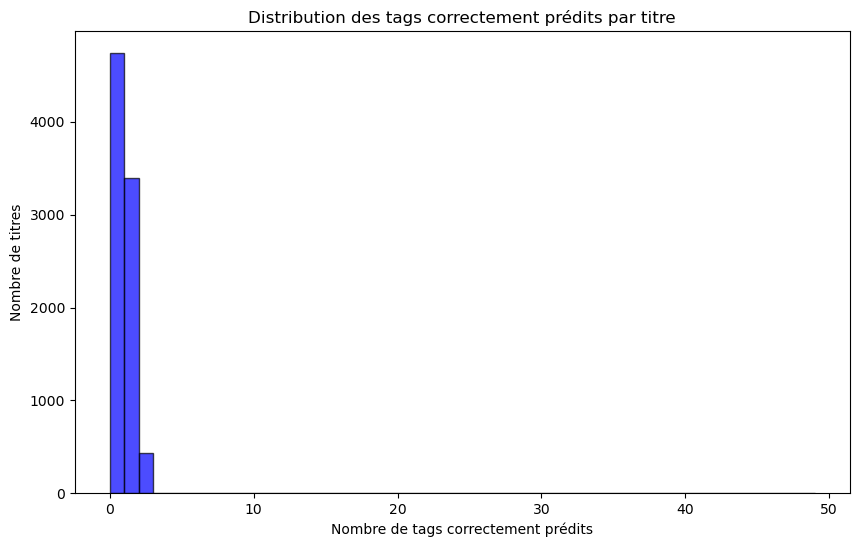

Nombre de titres où au moins un tag correct a été prédit : 3839 sur 8578
Proportion : 44.75%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2345 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1265
Nombre de faux négatifs (tags manquants mais présents): 7859
Epoch 7/10 - Précision: 0.7514, Rappel: 0.3527, F1 Score: 0.4641


Entraînement Epoch 8/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 733.39it/s]


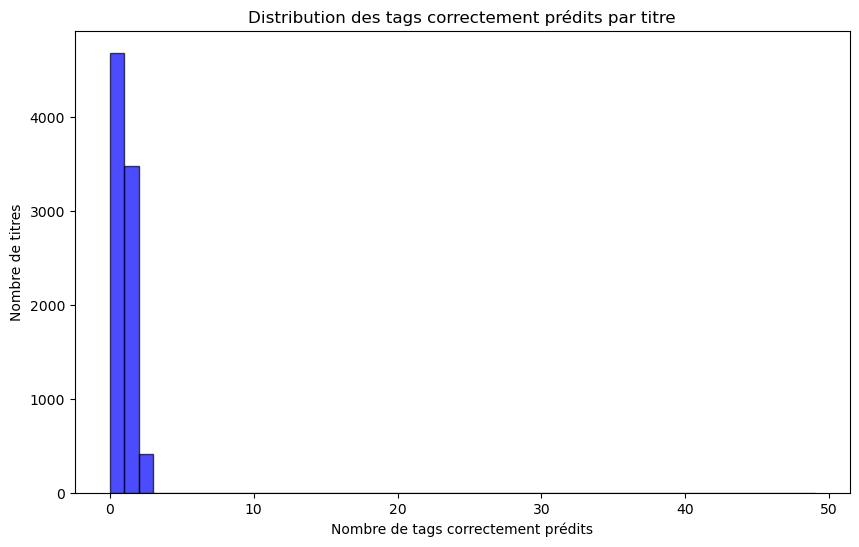

Nombre de titres où au moins un tag correct a été prédit : 3898 sur 8578
Proportion : 45.44%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2318 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1381
Nombre de faux négatifs (tags manquants mais présents): 7818
Epoch 8/10 - Précision: 0.7409, Rappel: 0.3561, F1 Score: 0.4694


Entraînement Epoch 9/10: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 730.07it/s]


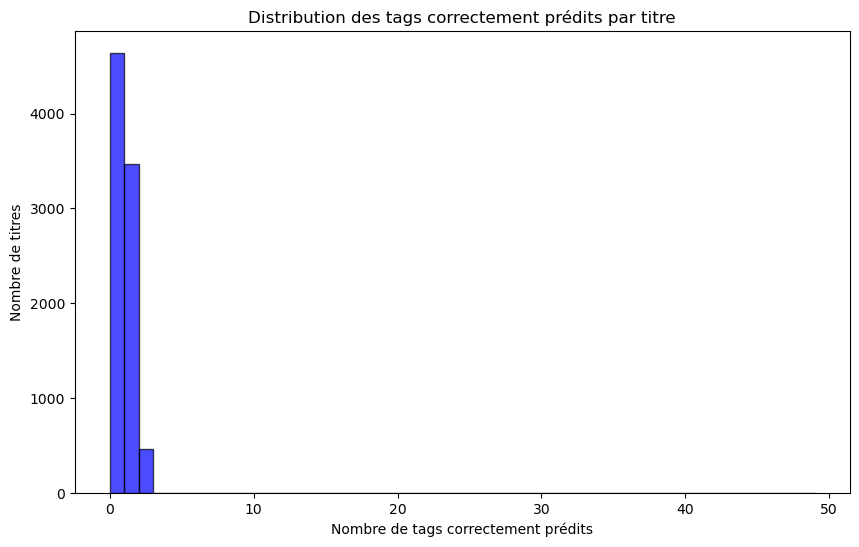

Nombre de titres où au moins un tag correct a été prédit : 3942 sur 8578
Proportion : 45.95%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2428 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1378
Nombre de faux négatifs (tags manquants mais présents): 7721
Epoch 9/10 - Précision: 0.7377, Rappel: 0.3641, F1 Score: 0.4771


Entraînement Epoch 10/10: 100%|████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:01<00:00, 727.77it/s]


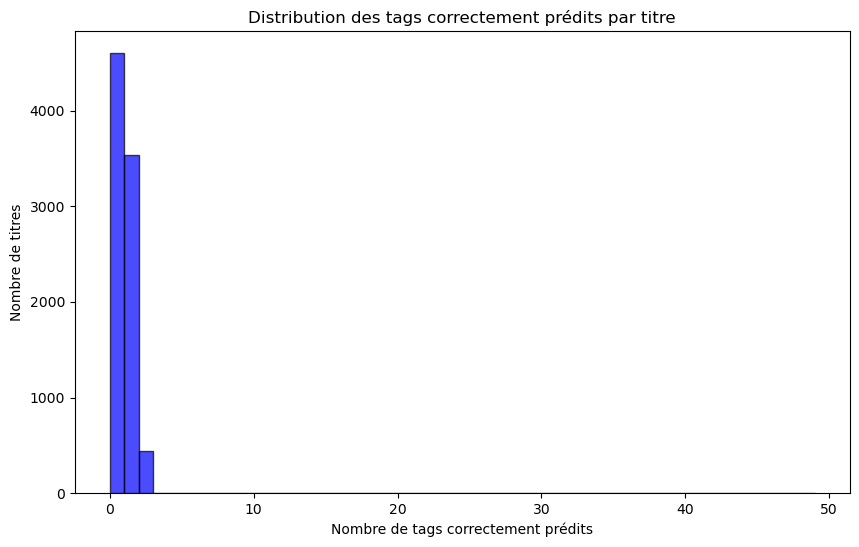

2024/08/23 01:07:51 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.4.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Nombre de titres où au moins un tag correct a été prédit : 3979 sur 8578
Proportion : 46.39%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 2444 sur 8578
Nombre de faux positifs (tags prédits mais absents): 1269
Nombre de faux négatifs (tags manquants mais présents): 7719
Epoch 10/10 - Précision: 0.7518, Rappel: 0.3642, F1 Score: 0.4750
Modèle: Doc2Vec_MLP_Model
Précision finale: 0.7518
Rappel final: 0.3642
F1 Score final: 0.4750


2024/08/23 01:07:54 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.4.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2024/08/23 01:07:54 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modèle enregistré


In [6]:
import pandas as pd
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import mlflow
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import gc
from collections import Counter

# =============================== #
#         HYPERPARAMÈTRES         #
# =============================== #
echan=1
min_occurrences = 400 
batch_size = 32        
epochs = 10            
learning_rate = 0.001  
threshold = 0.5  

# =============================== #
#         CHARGEMENT DES DONNÉES  #
# =============================== #

print("Chargement et prétraitement des données...")

df = pd.read_csv('/home/mf/CoursOC/Projet5/mlflow/data/Prepared_Data_with_Embeddings.csv')
df = df.sample(frac=echan, random_state=1)  

df['Title'] = df['Title'].astype(str)
df['Tags'] = df['Tags'].apply(eval)  
df.dropna(inplace=True)

tag_list = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = Counter(tag_list)
filtered_tags = {tag for tag, count in tag_counts.items() if count >= min_occurrences}

df['Filtered_Tags'] = df['Tags'].apply(lambda tags: [tag for tag in tags if tag in filtered_tags])
df = df[df['Filtered_Tags'].apply(len) > 0]

# Binarisation des étiquettes
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Filtered_Tags'])

# =============================== #
#   VECTORISATION DOC2VEC         #
# =============================== #

print("Préparation des données pour Doc2Vec...")

tagged_data = [TaggedDocument(words=text.split(), tags=[str(i)]) for i, text in enumerate(df['Title'])]

doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

def create_doc2vec_embeddings(texts, model_doc2vec):
    embeddings = []
    for text in tqdm(texts, desc="Creating Doc2Vec embeddings"):
        text_embedding = model_doc2vec.infer_vector(text.split())
        embeddings.append(text_embedding)
    return np.array(embeddings)

X_dense = create_doc2vec_embeddings(df['Title'], doc2vec_model)

# Normalisation des embeddings
scaler = StandardScaler()
X_dense = scaler.fit_transform(X_dense)

np.save("mlb_classes.npy", mlb.classes_)

# =============================== #
#     DIVISION DES DONNÉES        #
# =============================== #

print("Division des données en train et validation...")

X_train, X_val, y_train, y_val = train_test_split(X_dense, y, test_size=0.2, random_state=42)

print("Dimensions des tags d'entraînement :", y_train.shape)
print("Dimensions des tags de validation :", y_val.shape)
print("Nombre de tags dans y_train :", np.sum(y_train.sum(axis=0) > 0))
print("Nombre de tags dans y_val :", np.sum(y_val.sum(axis=0) > 0))

# =============================== #
#     DÉFINITION DU MODÈLE MLP    #
# =============================== #

class MLPModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return torch.sigmoid(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    print("Le GPU est utilisé pour l'entraînement du modèle.")
else:
    print("Le CPU est utilisé pour l'entraînement du modèle.")

model = MLPModel(input_dim=X_train.shape[1], output_dim=y_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# =============================== #
#    ENTRAÎNEMENT DU MODÈLE      #
# =============================== #

def train_evaluate_model(X_train, y_train, X_val, y_val, model_name):
    print(f"Entraînement du modèle {model_name}...")
    
    # Préparation des données
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32).to(device),
                                  torch.tensor(y_train, dtype=torch.float32).to(device))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Démarrage d'une session MLFlow
    with mlflow.start_run(run_name=model_name):
        # Entraînement du modèle
        for epoch in range(epochs):
            model.train()
            for inputs, labels in tqdm(train_loader, desc=f"Entraînement Epoch {epoch+1}/{epochs}"):
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            # Évaluation du modèle après chaque époque
            model.eval()
            with torch.no_grad():
                y_pred_tensor = model(torch.tensor(X_val, dtype=torch.float32).to(device))
                y_pred = (y_pred_tensor.cpu().numpy() > threshold).astype(int)
                
            # Appeler la fonction pour analyser les prédictions correctes
            analyze_correct_tag_predictions(y_val, y_pred, mlb)
            
            # Calcul du nombre de tags bien prédits
            correct_predictions = np.sum(np.all(y_pred == y_val, axis=1))
            print(f"Nombre de tags correctement prédits (pour tous les tags d'un échantillon): {correct_predictions} sur {y_val.shape[0]}")
 
            # Calcul des faux positifs et faux négatifs
            false_positives = np.sum((y_pred == 1) & (y_val == 0))
            false_negatives = np.sum((y_pred == 0) & (y_val == 1))
            print(f"Nombre de faux positifs (tags prédits mais absents): {false_positives}")
            print(f"Nombre de faux négatifs (tags manquants mais présents): {false_negatives}")
        
            # Calcul des métriques
            precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

            print(f"Epoch {epoch+1}/{epochs} - Précision: {precision:.4f}, Rappel: {recall:.4f}, F1 Score: {f1:.4f}")

        print(f"Modèle: {model_name}")
        print(f"Précision finale: {precision:.4f}")
        print(f"Rappel final: {recall:.4f}")
        print(f"F1 Score final: {f1:.4f}")

        # Enregistrement des métriques dans MLflow
        mlflow.log_metric("precision_final", precision)
        mlflow.log_metric("recall_final", recall)
        mlflow.log_metric("f1_score_final", f1)

        # Enregistrement du modèle final
        mlflow.pytorch.log_model(model, model_name)
        print('Modèle enregistré')

# =============================== #
#        ENTRAÎNEMENT ET ÉVALUATION #
# =============================== #

# Entraînement et évaluation du modèle
train_evaluate_model(X_train, y_train, X_val, y_val, "Doc2Vec_MLP_Model")


## 2.4 Use + MLP


2024-08-23 01:22:15.205615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 01:22:15.221258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 01:22:15.225907: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-23 01:22:15.237932: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-23 01:22:16.022005: W tensorflow/compiler/tf2

Chargement et prétraitement des données...
Conversion des titres en embeddings USE...


I0000 00:00:1724368939.947376  314995 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724368939.981007  314995 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724368939.981177  314995 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724368939.981979  314995 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Division des données en train et validation...
Dimensions des tags d'entraînement : (39940, 3141)
Dimensions des tags de validation : (9985, 3141)
Nombre de tags dans y_train : 3141
Nombre de tags dans y_val : 2817
Définition du modèle MLP...
Le GPU est utilisé pour l'entraînement du modèle.
Entraînement du modèle USE_MLP_Model...


Entraînement Epoch 1/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 946.53it/s]


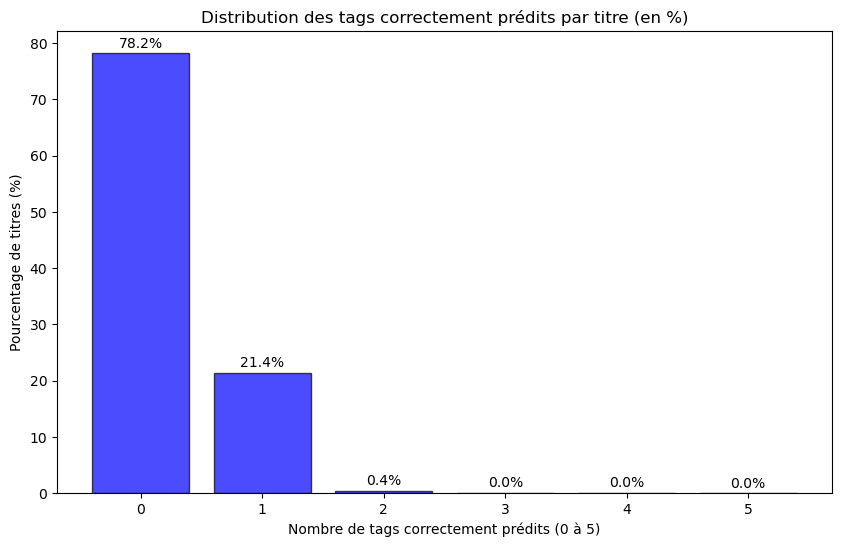

Nombre de titres où au moins un tag correct a été prédit : 2176 sur 9985
Proportion : 21.79%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 28 sur 9985
Nombre de faux positifs (tags prédits mais absents): 397
Nombre de faux négatifs (tags manquants mais présents): 27692
Epoch 1/15 - F1 Score: 0.0963


Entraînement Epoch 2/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 893.95it/s]


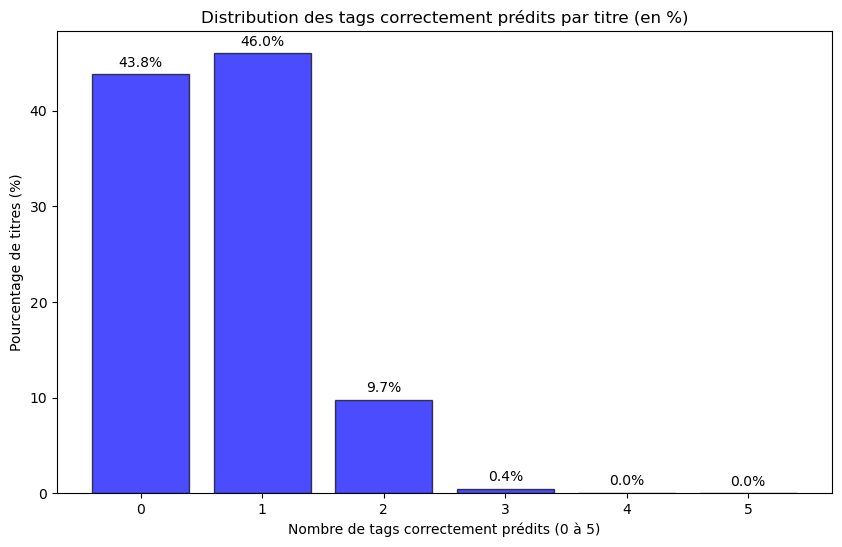

Nombre de titres où au moins un tag correct a été prédit : 5610 sur 9985
Proportion : 56.18%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 300 sur 9985
Nombre de faux positifs (tags prédits mais absents): 1674
Nombre de faux négatifs (tags manquants mais présents): 23244
Epoch 2/15 - F1 Score: 0.2673


Entraînement Epoch 3/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 932.05it/s]


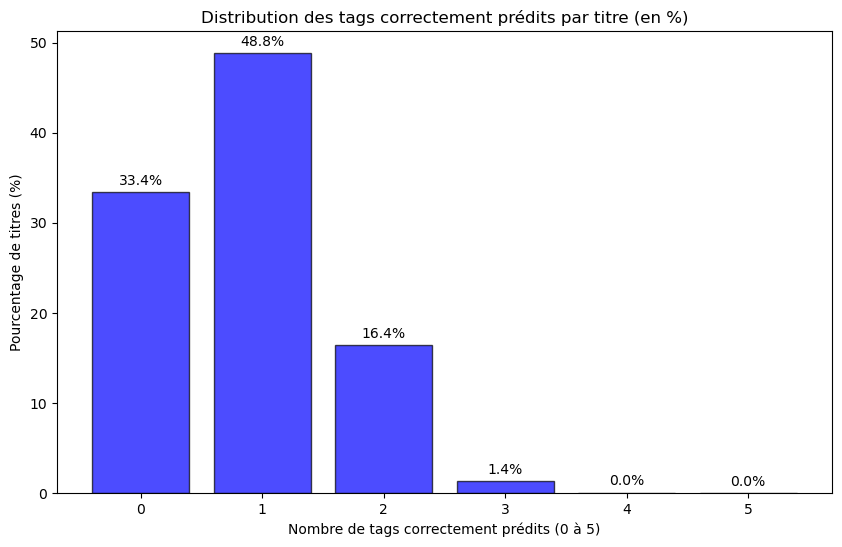

Nombre de titres où au moins un tag correct a été prédit : 6652 sur 9985
Proportion : 66.62%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 481 sur 9985
Nombre de faux positifs (tags prédits mais absents): 2041
Nombre de faux négatifs (tags manquants mais présents): 21341
Epoch 3/15 - F1 Score: 0.3408


Entraînement Epoch 4/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 976.92it/s]


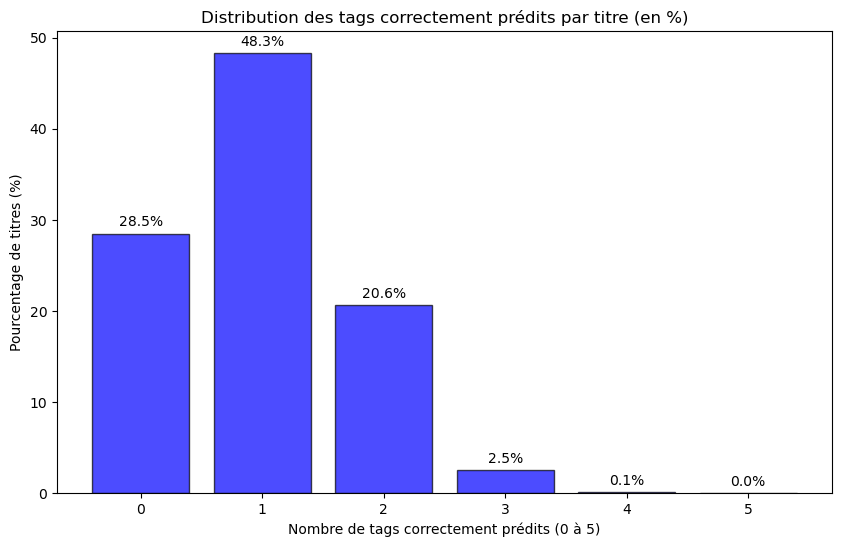

Nombre de titres où au moins un tag correct a été prédit : 7139 sur 9985
Proportion : 71.50%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 667 sur 9985
Nombre de faux positifs (tags prédits mais absents): 2451
Nombre de faux négatifs (tags manquants mais présents): 20194
Epoch 4/15 - F1 Score: 0.3846


Entraînement Epoch 5/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 956.40it/s]


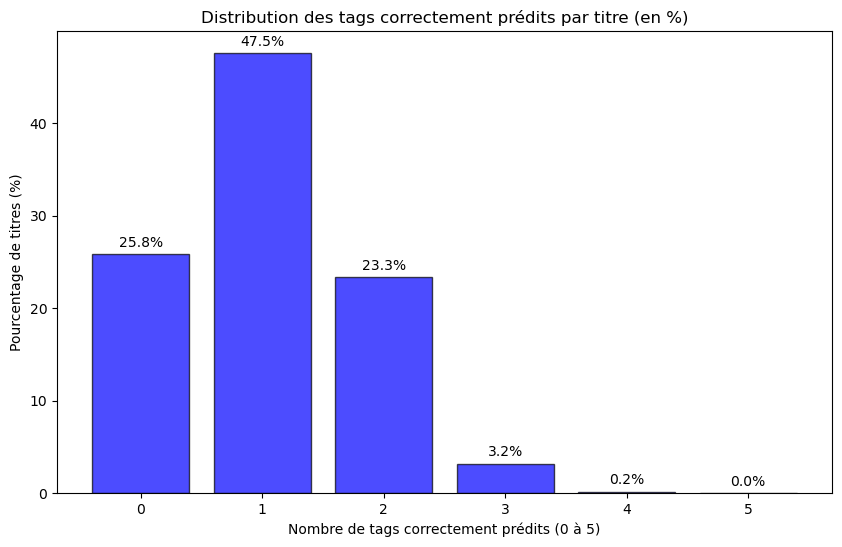

Nombre de titres où au moins un tag correct a été prédit : 7407 sur 9985
Proportion : 74.18%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 750 sur 9985
Nombre de faux positifs (tags prédits mais absents): 2775
Nombre de faux négatifs (tags manquants mais présents): 19495
Epoch 5/15 - F1 Score: 0.4113


Entraînement Epoch 6/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 955.61it/s]


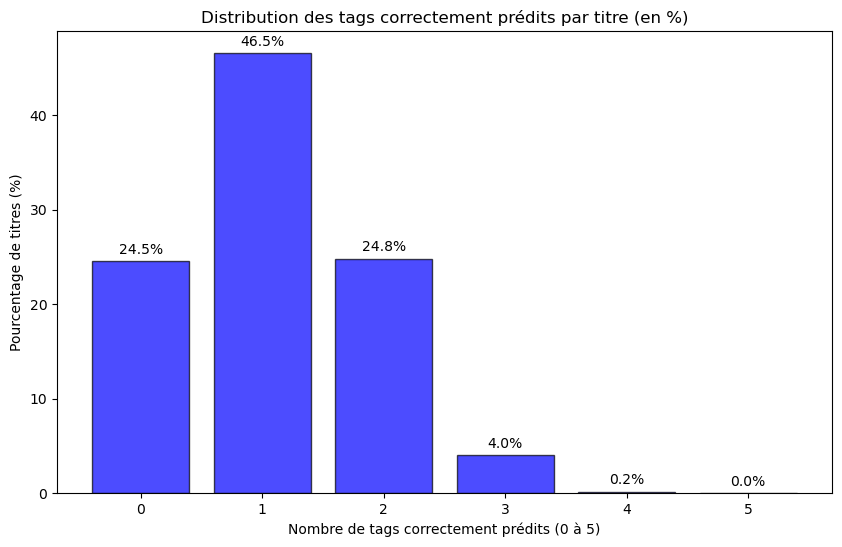

Nombre de titres où au moins un tag correct a été prédit : 7536 sur 9985
Proportion : 75.47%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 810 sur 9985
Nombre de faux positifs (tags prédits mais absents): 3064
Nombre de faux négatifs (tags manquants mais présents): 19053
Epoch 6/15 - F1 Score: 0.4268


Entraînement Epoch 7/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 987.10it/s]


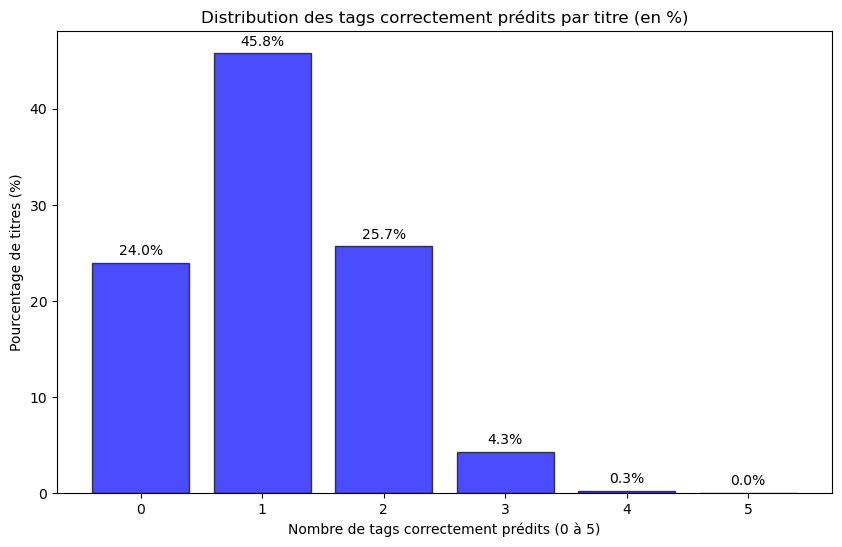

Nombre de titres où au moins un tag correct a été prédit : 7592 sur 9985
Proportion : 76.03%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 853 sur 9985
Nombre de faux positifs (tags prédits mais absents): 3126
Nombre de faux négatifs (tags manquants mais présents): 18817
Epoch 7/15 - F1 Score: 0.4394


Entraînement Epoch 8/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 986.74it/s]


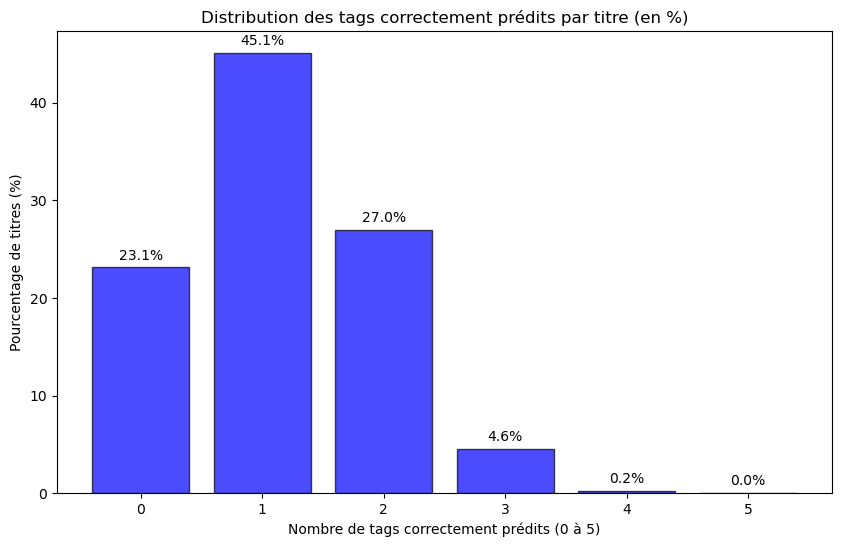

Nombre de titres où au moins un tag correct a été prédit : 7675 sur 9985
Proportion : 76.87%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 886 sur 9985
Nombre de faux positifs (tags prédits mais absents): 3317
Nombre de faux négatifs (tags manquants mais présents): 18562
Epoch 8/15 - F1 Score: 0.4472


Entraînement Epoch 9/15: 100%|█████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 980.65it/s]


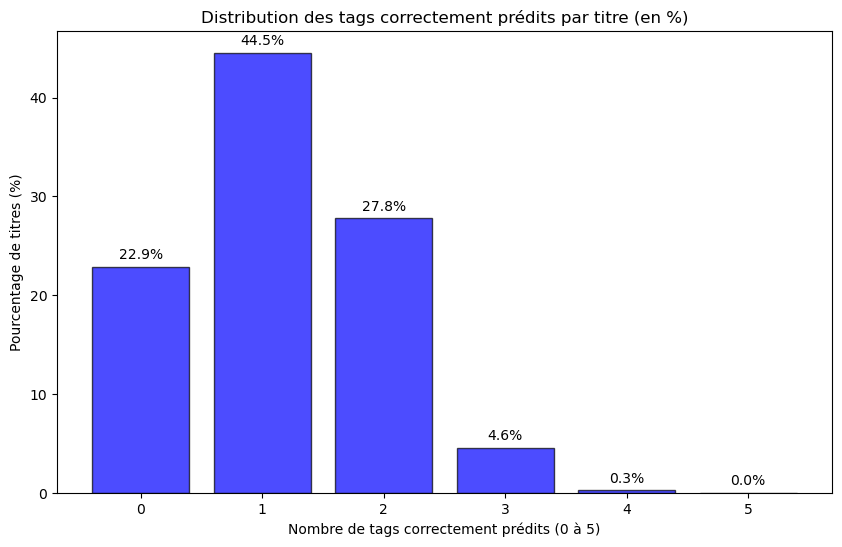

Nombre de titres où au moins un tag correct a été prédit : 7698 sur 9985
Proportion : 77.10%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 873 sur 9985
Nombre de faux positifs (tags prédits mais absents): 3527
Nombre de faux négatifs (tags manquants mais présents): 18448
Epoch 9/15 - F1 Score: 0.4515


Entraînement Epoch 10/15: 100%|████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 987.78it/s]


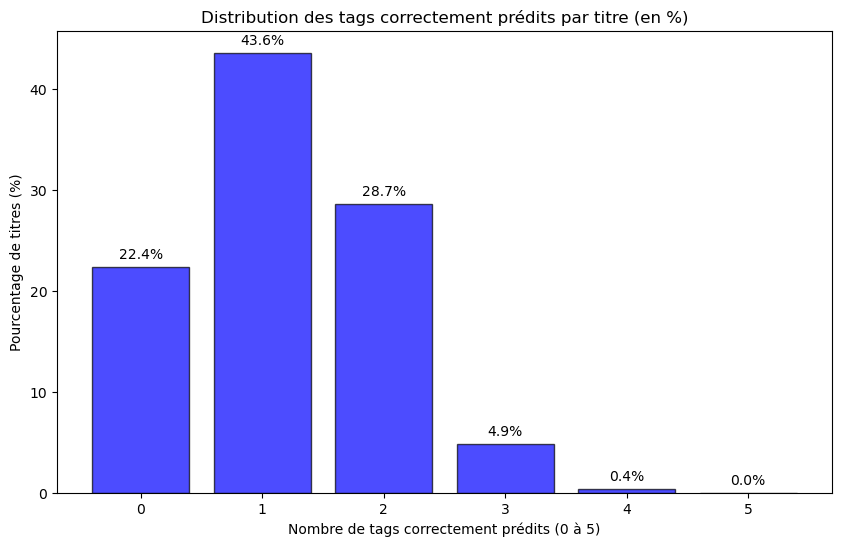

Nombre de titres où au moins un tag correct a été prédit : 7746 sur 9985
Proportion : 77.58%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 917 sur 9985
Nombre de faux positifs (tags prédits mais absents): 3734
Nombre de faux négatifs (tags manquants mais présents): 18202
Epoch 10/15 - F1 Score: 0.4588


Entraînement Epoch 11/15: 100%|████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 982.28it/s]


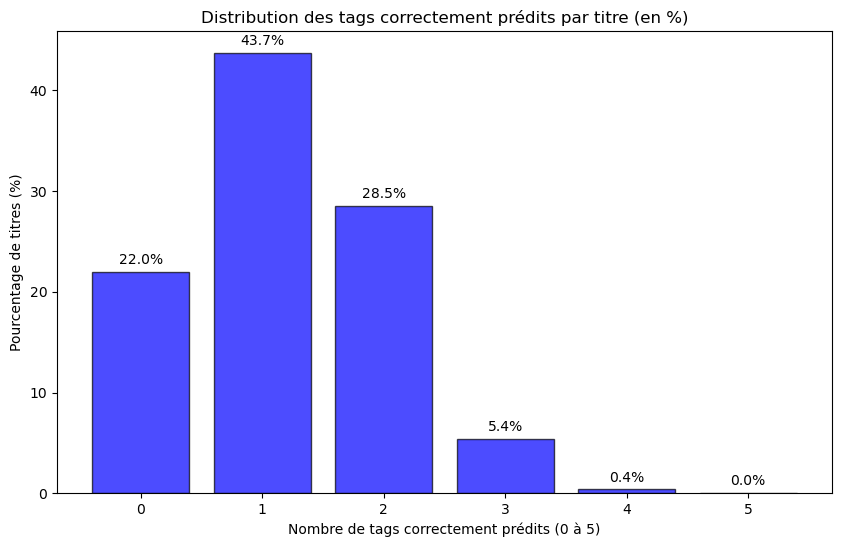

Nombre de titres où au moins un tag correct a été prédit : 7787 sur 9985
Proportion : 77.99%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 912 sur 9985
Nombre de faux positifs (tags prédits mais absents): 3819
Nombre de faux négatifs (tags manquants mais présents): 18083
Epoch 11/15 - F1 Score: 0.4633


Entraînement Epoch 12/15: 100%|████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 984.53it/s]


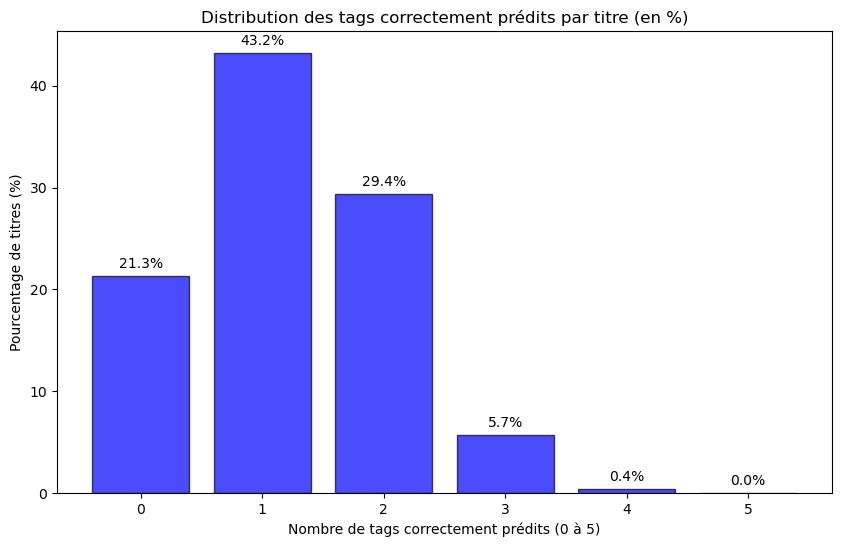

Nombre de titres où au moins un tag correct a été prédit : 7856 sur 9985
Proportion : 78.68%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 931 sur 9985
Nombre de faux positifs (tags prédits mais absents): 4120
Nombre de faux négatifs (tags manquants mais présents): 17861
Epoch 12/15 - F1 Score: 0.4690


Entraînement Epoch 13/15: 100%|████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 979.69it/s]


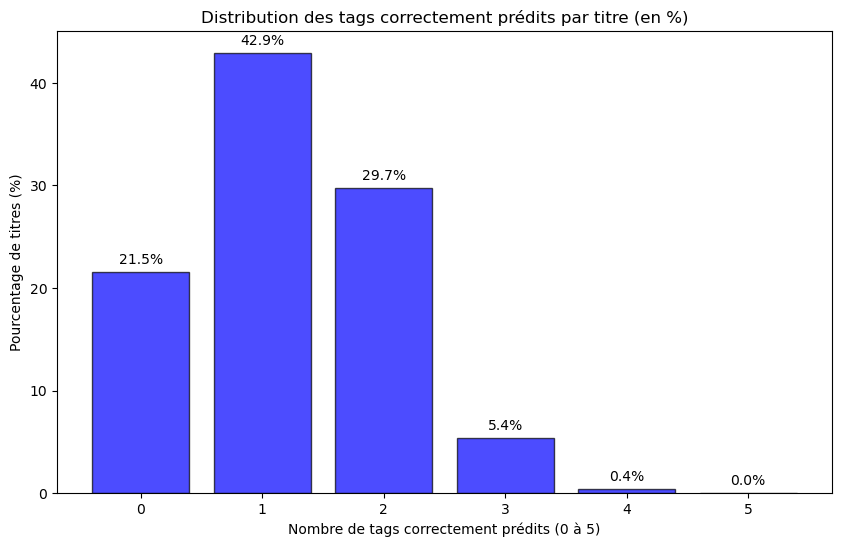

Nombre de titres où au moins un tag correct a été prédit : 7836 sur 9985
Proportion : 78.48%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 919 sur 9985
Nombre de faux positifs (tags prédits mais absents): 4109
Nombre de faux négatifs (tags manquants mais présents): 17899
Epoch 13/15 - F1 Score: 0.4688


Entraînement Epoch 14/15: 100%|████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 987.47it/s]


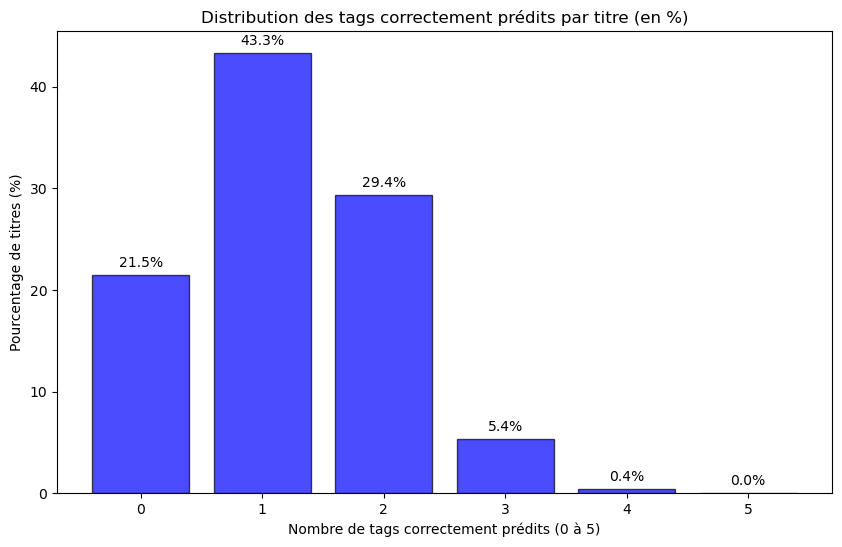

Nombre de titres où au moins un tag correct a été prédit : 7837 sur 9985
Proportion : 78.49%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 911 sur 9985
Nombre de faux positifs (tags prédits mais absents): 4075
Nombre de faux négatifs (tags manquants mais présents): 17940
Epoch 14/15 - F1 Score: 0.4687


Entraînement Epoch 15/15: 100%|████████████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:04<00:00, 985.86it/s]


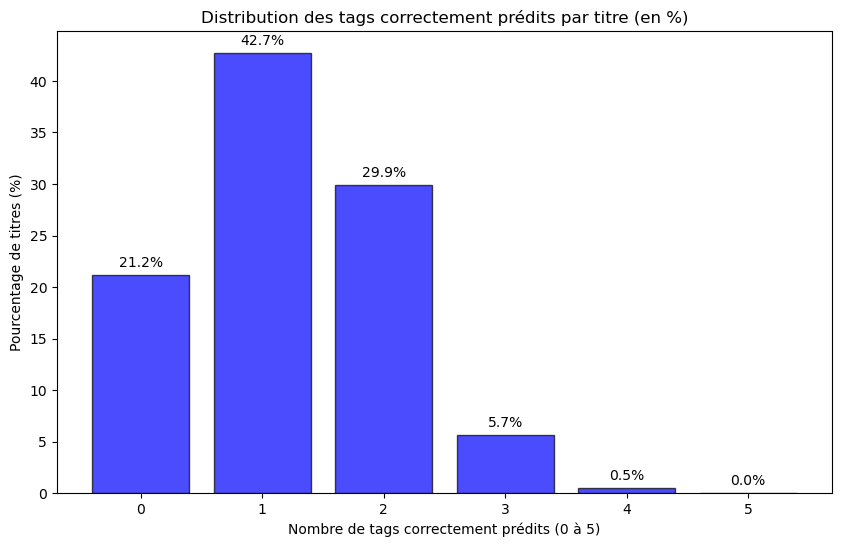

Nombre de titres où au moins un tag correct a été prédit : 7870 sur 9985
Proportion : 78.82%
Nombre de tags correctement prédits (pour tous les tags d'un échantillon): 914 sur 9985
Nombre de faux positifs (tags prédits mais absents): 4414
Nombre de faux négatifs (tags manquants mais présents): 17765


2024/08/23 01:26:01 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.4.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.


Epoch 15/15 - F1 Score: 0.4707
Modèle: USE_MLP_Model
Précision finale: 0.6165
Rappel final: 0.4062
F1 Score final: 0.4707


2024/08/23 01:26:04 WARNING mlflow.utils.requirements_utils: Found torch version (2.4.0+cu118) contains a local version label (+cu118). MLflow logged a pip requirement for this package as 'torch==2.4.0' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
/home/mf/miniconda3/envs/AI/lib/python3.10/site-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/08/23 01:26:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


Modèle enregistré


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import mlflow
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import gc
from collections import Counter

# =============================== #
#         HYPERPARAMÈTRES         #
# =============================== #
echan = 1
batch_size = 10
epochs = 15

# =============================== #
#       PRÉPARATION DES DONNÉES   #
# =============================== #

print("Chargement et prétraitement des données...")

df = pd.read_csv('/home/mf/CoursOC/Projet5/mlflow/data/Prepared_Data_with_Embeddings.csv')
df = df.sample(frac=echan, random_state=1)

df['Title'] = df['Title'].astype(str)
df['Tags'] = df['Tags'].apply(eval)
df.dropna(inplace=True)

tag_list = [tag for sublist in df['Tags'] for tag in sublist]
tag_counts = Counter(tag_list)
min_occurrences = 5
filtered_tags = {tag for tag, count in tag_counts.items() if count >= min_occurrences}

df['Filtered_Tags'] = df['Tags'].apply(lambda tags: [tag for tag in tags if tag in filtered_tags])
df = df[df['Filtered_Tags'].apply(len) > 0]

mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Filtered_Tags'])

# =============================== #
#   CONVERSION EN EMBEDDINGS USE  #
# =============================== #

print("Conversion des titres en embeddings USE...")

device_name = '/CPU:0'

with tf.device(device_name):
    use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def create_use_embeddings(texts, model, batch_size=batch_size):
    embeddings = []
    for start in tqdm(range(0, len(texts), batch_size), desc="Encodage USE"):
        end = min(start + batch_size, len(texts))
        batch_texts = texts[start:end]
        with tf.device(device_name):
            batch_embeddings = model(batch_texts).numpy()
        embeddings.extend(batch_embeddings)
    return np.array(embeddings)

X_dense = create_use_embeddings(df['Title'].tolist(), use_model, batch_size=batch_size)

# =============================== #
#     DIVISION DES DONNÉES        #
# =============================== #

print("Division des données en train et validation...")

X_train, X_val, y_train, y_val = train_test_split(X_dense, y, test_size=0.2, random_state=42)

print("Dimensions des tags d'entraînement :", y_train.shape)
print("Dimensions des tags de validation :", y_val.shape)
print("Nombre de tags dans y_train :", np.sum(y_train.sum(axis=0) > 0))
print("Nombre de tags dans y_val :", np.sum(y_val.sum(axis=0) > 0))

# =============================== #
#     DÉFINITION DU MODÈLE MLP    #
# =============================== #

print("Définition du modèle MLP...")

class MLPModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_size=2048):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if device.type == 'cuda':
    print("Le GPU est utilisé pour l'entraînement du modèle.")
else:
    print("Le CPU est utilisé pour l'entraînement du modèle.")

model = MLPModel(input_dim=X_train.shape[1], output_dim=y_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# =============================== #
#    ENTRAÎNEMENT DU MODÈLE      #
# =============================== #

def train_evaluate_model(X_train, y_train, X_val, y_val, model_name):
    print(f"Entraînement du modèle {model_name}...")
    
    train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32).to(device),
                                  torch.tensor(y_train, dtype=torch.float32).to(device))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    with mlflow.start_run(run_name=model_name):
        for epoch in range(epochs):
            model.train()
            for inputs, labels in tqdm(train_loader, desc=f"Entraînement Epoch {epoch+1}/{epochs}"):
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

            model.eval()
            with torch.no_grad():
                y_pred_tensor = model(torch.tensor(X_val, dtype=torch.float32).to(device))
                y_pred = (y_pred_tensor.cpu().numpy() > 0.5).astype(int)

            # Appeler la fonction pour analyser les prédictions correctes
            analyze_correct_tag_predictions(y_val, y_pred, mlb)                    
            
            correct_predictions = np.sum(np.all(y_pred == y_val, axis=1))
            print(f"Nombre de tags correctement prédits (pour tous les tags d'un échantillon): {correct_predictions} sur {y_val.shape[0]}")

            false_positives = np.sum((y_pred == 1) & (y_val == 0))
            false_negatives = np.sum((y_pred == 0) & (y_val == 1))
            print(f"Nombre de faux positifs (tags prédits mais absents): {false_positives}")
            print(f"Nombre de faux négatifs (tags manquants mais présents): {false_negatives}")

            precision = precision_score(y_val, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_val, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_val, y_pred, average='weighted', zero_division=0)

            print(f"Epoch {epoch+1}/{epochs} - F1 Score: {f1:.4f}")
            
            # Libération de la mémoire GPU
            del y_pred_tensor, y_pred
            torch.cuda.empty_cache()
            gc.collect()

        print(f"Modèle: {model_name}")
        print(f"Précision finale: {precision:.4f}")
        print(f"Rappel final: {recall:.4f}")
        print(f"F1 Score final: {f1:.4f}")

        mlflow.log_metric("precision_final", precision)
        mlflow.log_metric("recall_final", recall)
        mlflow.log_metric("f1_score_final", f1)

        mlflow.pytorch.log_model(model, model_name)
        print('Modèle enregistré')

# =============================== #
#        ENTRAÎNEMENT ET ÉVALUATION #
# =============================== #

train_evaluate_model(X_train, y_train, X_val, y_val, "USE_MLP_Model")


# Fonction

In [3]:
import matplotlib.pyplot as plt

def analyze_correct_tag_predictions(y_val, y_pred, mlb):
    """
    Analyse les prédictions correctes des tags et affiche un histogramme de la distribution
    des tags correctement prédits par titre. Affiche également la proportion de titres
    pour lesquels au moins un tag correct a été prédit.

    Args:
        y_val (numpy.ndarray): Étiquettes réelles pour l'ensemble de validation.
        y_pred (numpy.ndarray): Étiquettes prédites par le modèle pour l'ensemble de validation.
        mlb (MultiLabelBinarizer): Binariseur multi-étiquette pour la conversion des tags.
    """
    # Compter le nombre de tags correctement prédits pour chaque titre
    correct_tag_counts = []
    for i in range(len(y_val)):
        correct_tags = np.sum((y_pred[i] == 1) & (y_val[i] == 1))  # Tags correctement prédits
        correct_tag_counts.append(correct_tags)

    # Calculer le pourcentage
    total_titles = len(y_val)
    percentages = [(correct_tag_counts.count(i) / total_titles) * 100 for i in range(0, 6)]

    # Visualisation : histogramme de la distribution des tags correctement prédits avec pourcentage
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(0, 6), percentages, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel('Nombre de tags correctement prédits (0 à 5)')
    plt.ylabel('Pourcentage de titres (%)')
    plt.title('Distribution des tags correctement prédits par titre (en %)')
    plt.xticks(range(0, 6))

    # Ajouter les pourcentages sur chaque barre
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

    # Calculer et afficher la proportion de titres pour lesquels au moins un tag correct a été prédit
    at_least_one_correct = np.sum(np.array(correct_tag_counts) > 0)
    print(f"Nombre de titres où au moins un tag correct a été prédit : {at_least_one_correct} sur {len(y_val)}")
    print(f"Proportion : {at_least_one_correct / len(y_val):.2%}")

print('ok')

ok
